In [2]:
import pandas as pd
import pymysql
conn = pymysql.Connect(host='127.0.0.1',
                       port=3306,
                       user='root',
                       passwd='password',
                       db='tradedb',
                       charset='utf8')
df = pd.read_sql('select * from tradeseason;', con=conn)    
# df2 = pd.read_sql('select * from covidseason;', con=conn)    
conn.close()

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df

,imports_exports,date_season,commodity_code,chinese_description_good,engish_description_good,usd_value,ntd_value,tne_weight,kgm_weight
0,出口總值(含復出口),20111,701710,熔凝石英或其他熔化矽砂,Of fused quartz or other fused silica,383,11256,1,1490
1,出口總值(含復出口),20111,702000,其他玻璃製品,Other articles of glass,6194,181637,1397,1397875
2,出口總值(含復出口),20111,841989,其他,Other,17972,527469,1034,1034385
3,出口總值(含復出口),20111,841990,零件,Parts,4979,145849,374,373986
4,出口總值(含復出口),20111,842119,其他,Other,264,7759,17,17213
...,...,...,...,...,...,...,...,...,...
3829,進口總值(含復進口),20213,903090,零件及附件,Parts and accessories,163774,4567790,268,268472
3830,進口總值(含復進口),20213,903141,供檢查半導體晶圓或裝置或供檢查製造半導體裝置所使用之光罩或網線者,For inspecting semiconductor wafers or device...,256157,7144227,287,287488
3831,進口總值(含復進口),20213,903149,其他,Other,43380,1209830,282,282384
3832,進口總值(含復進口),20213,903180,其他儀器、用具及機器,Other instruments appliances and machines,49637,1384577,142,141839


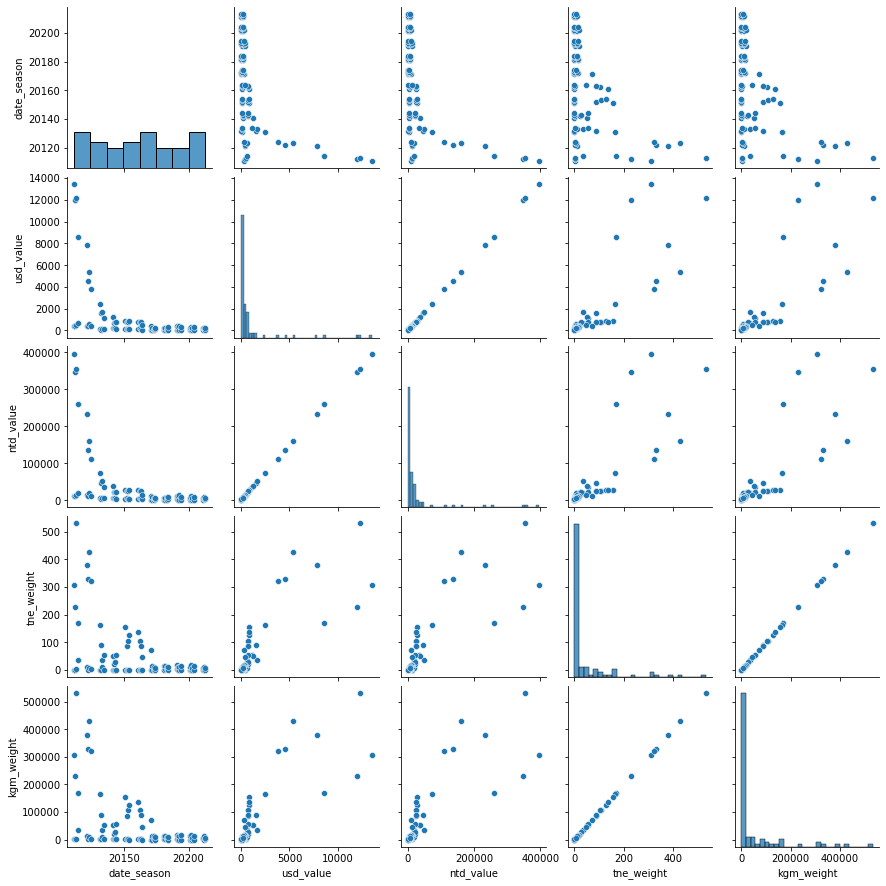

In [10]:
df2 = df
df2['date_season'] = df2['date_season'].astype(int)
sns.pairplot(df2[df2['commodity_code']=='701710'])

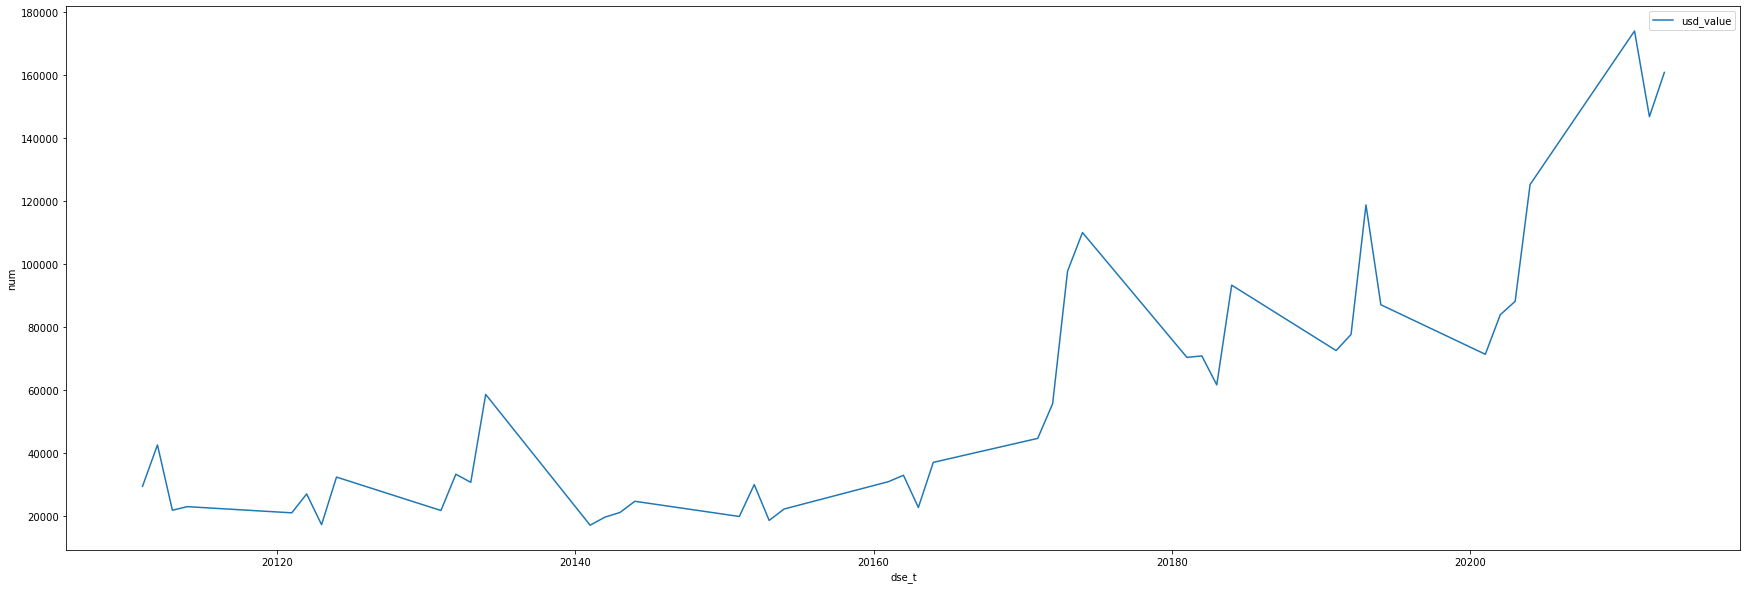

In [17]:
rows = (df['commodity_code'] == '848620')&(df['imports_exports'] == '出口總值(含復出口)')
columns = ['date_season', 'usd_value']
result = df.loc[rows, columns]
result.set_index('date_season', inplace=True)
# print(result)
chart = result.plot(xlabel='dse_t',  
                    ylabel='num',  
                    legend=True,  
                    figsize=(30, 10)) 
plt.show()

In [22]:
commodity_code = set(df['commodity_code'])
for i in commodity_code:
    print(i)

845610
847950
842119
848071
847989
854150
903190
851430
854330
842489
701710
848620
846420
848640
851531
846410
851490
901110
846691
851981
848610
903082
903180
901120
842191
903090
846693
852359
851420
847990
854390
702000
841989
901190
854140
901290
848690
847710
851410
842490
901210
903141
903149
846490
841990


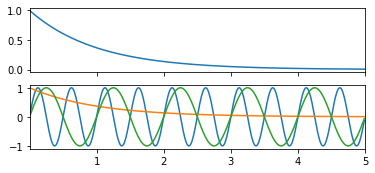

In [29]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.01, 5.0, 0.01)
s1 = np.sin(2 * np.pi * t)
s2 = np.exp(-t)
s3 = np.sin(4 * np.pi * t)

# ax1 = plt.subplot(311)
# plt.plot(t, s1)
# plt.setp(ax1.get_xticklabels(), fontsize=6)

# share x only
ax2 = plt.subplot(312, sharex=ax1)
plt.plot(t, s2)
# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=False)

# share x and y
ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
plt.plot(t, s3)
plt.plot(t, s2)
plt.plot(t, s1)
plt.xlim(0.01, 5.0)
plt.show()

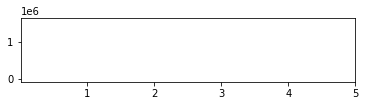

In [35]:
ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
plt.plot(df['date_season'],df['usd_value'])
plt.xlim(0.01, 5.0)
plt.show()

In [ ]:
rows = [日期]
column = [各國]
value = [usd_value]


In [42]:
np.transpose(df.loc[:,['commodity_code','date_season','usd_value']])

,0,1,2,3,4,5,6,7,8,9,...,3824,3825,3826,3827,3828,3829,3830,3831,3832,3833
commodity_code,701710,702000,841989,841990,842119,842191,842489,842490,845610,846410,...,901120,901190,901210,901290,903082,903090,903141,903149,903180,903190
date_season,20111,20111,20111,20111,20111,20111,20111,20111,20111,20111,...,20213,20213,20213,20213,20213,20213,20213,20213,20213,20213
usd_value,383,6194,17972,4979,264,381,2412,8130,5684,23,...,337,1033,2012,1504,188279,163774,256157,43380,49637,49437
